In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Dataset Loading and preprocessing
import os
import cv2
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')

DATASET_PATH = "/content/drive/MyDrive/"
AI_DIR = os.path.join(DATASET_PATH, "AI_GENERATED")
HUMAN_DIR = os.path.join(DATASET_PATH, "NON_AI_GENERATED")

IMG_SIZE = 224  # Standard size for CNN input

# to load images
def load_images(folder, label):
    data = []
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)

        # Read image with OpenCV
        img = cv2.imread(img_path)

        # Handle potential issues with loading images
        if img is None:
            print(f"Skipping invalid image: {img_path}")
            continue

        # Resize image to match model input size
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        # Convert to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Append image and corresponding label
        data.append((img, label))

    return data

# Load both AI-generated and human-created images
ai_images = load_images(AI_DIR, 1)
human_images = load_images(HUMAN_DIR, 0)

# Combine datasets and shuffle
dataset = ai_images + human_images
np.random.shuffle(dataset)

# Prepare input and labels
X, y = zip(*dataset)
X = np.array(X) / 255.0  # Normalize pixel values (0-1)
y = np.array(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save dataset in Drive for future use
np.save("/content/drive/MyDrive/X_train.npy", X_train)
np.save("/content/drive/MyDrive/X_test.npy", X_test)
np.save("/content/drive/MyDrive/y_train.npy", y_train)
np.save("/content/drive/MyDrive/y_test.npy", y_test)

print(f"Dataset saved! Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

In [ ]:
#CNN MODEL DEFINITION AND TRAINING
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import os
# Mount Google Drive
import numpy as np

# Load dataset correctly
X_train = np.load("/content/drive/MyDrive/X_train.npy", allow_pickle=True)
X_test = np.load("/content/drive/MyDrive/X_test.npy", allow_pickle=True)
y_train = np.load("/content/drive/MyDrive/y_train.npy", allow_pickle=True)
y_test = np.load("/content/drive/MyDrive/y_test.npy", allow_pickle=True)

# Print shape to confirm data is loaded correctly
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (AI vs Human)
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

# Train model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Save trained model
model.save("/content/drive/MyDrive/ai_art_classifier.h5")



X_train shape: (2497, 224, 224, 3)
y_train shape: (2497,)
X_test shape: (625, 224, 224, 3)
y_test shape: (625,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.6349 - loss: 0.6502 - val_accuracy: 0.8080 - val_loss: 0.4191
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 278s 4s/step - accuracy: 0.8158 - loss: 0.3851 - val_accuracy: 0.8352 - val_loss: 0.3637
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 298s 3s/step - accuracy: 0.8490 - loss: 0.3278 - val_accuracy: 0.8528 - val_loss: 0.3318
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.8769 - loss: 0.2855 - val_accuracy: 0.8320 - val_loss: 0.3529
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 299s 4s/step - accuracy: 0.8836 - loss: 0.2717 - val_accuracy: 0.8592 - val_loss: 0.3147
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 287s 3s/step - accuracy: 0.9027 - loss: 0.2295 - val_accuracy: 0.8560 - val_loss: 0.3086
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.9243 - loss: 0.2009 - val_accuracy: 0.8192 - val_loss: 0.3888
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step - accuracy: 0.9152 - loss: 0.2159 - val_accuracy: 0.8640 - v

In [ ]:
#GE-CNN MODEL DEFINITION AND TRAINING
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Multiply, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
from google.colab import drive

drive.mount('/content/drive')


# Load dataset
X_train = np.load("/content/drive/MyDrive/X_train.npy", allow_pickle=True)
X_test = np.load("/content/drive/MyDrive/X_test.npy", allow_pickle=True)
y_train = np.load("/content/drive/MyDrive/y_train.npy", allow_pickle=True)
y_test = np.load("/content/drive/MyDrive/y_test.npy", allow_pickle=True)

# Print shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define gated convolution block
def gated_conv2d(x, filters, kernel_size, strides=(1,1), padding='same'):
    conv_feature = Conv2D(filters, kernel_size, strides=strides, padding=padding, activation='relu')(x)
    conv_gate = Conv2D(filters, kernel_size, strides=strides, padding=padding, activation='sigmoid')(x)
    return Multiply()([conv_feature, conv_gate])

# Build GCNN model
input_layer = Input(shape=(224, 224, 3))
x = gated_conv2d(input_layer, 32, (3, 3))
x = MaxPooling2D((2, 2))(x)
x = gated_conv2d(x, 64, (3, 3))
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

# Train model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Save model
model.save("/content/drive/MyDrive/ai_art_classifier_gcnn.h5")


In [ ]:
model.save("/content/drive/MyDrive/ai_art_classifier.h5")


Mounted at /content/drive


20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9522 - loss: 0.1452
Test Accuracy: 95.84%
Test Loss: 0.1337
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 892ms/step

Classification Report:
              precision    recall  f1-score   support

   Human Art       0.92      0.98      0.95       254
      AI Art       0.99      0.94      0.96       371

    accuracy                           0.96       625
   macro avg       0.95      0.96      0.96       625
weighted avg       0.96      0.96      0.96       625



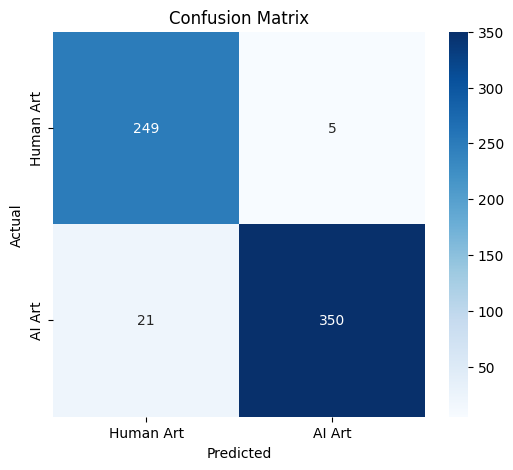

In [ ]:
#ACCURACY MEASUREMENTS FOR CNN MODEL
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive

drive.mount('/content/drive')


# Load the trained model
model_path = "/content/drive/MyDrive/ai_art_classifier.h5"
model = load_model(model_path)

# Load test dataset
X_test = np.load("/content/drive/MyDrive/X_test.npy")
y_test = np.load("/content/drive/MyDrive/y_test.npy")

# Evaluate model performance
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test)  # Get probability scores
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary labels

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Human Art", "AI Art"]))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Human Art", "AI Art"], yticklabels=["Human Art", "AI Art"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Mounted at /content/drive


20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.8756 - loss: 0.2749
Test Accuracy: 88.16%
Test Loss: 0.2677
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step

Classification Report:
              precision    recall  f1-score   support

   Human Art       0.81      0.92      0.86       254
      AI Art       0.94      0.85      0.90       371

    accuracy                           0.88       625
   macro avg       0.88      0.89      0.88       625
weighted avg       0.89      0.88      0.88       625



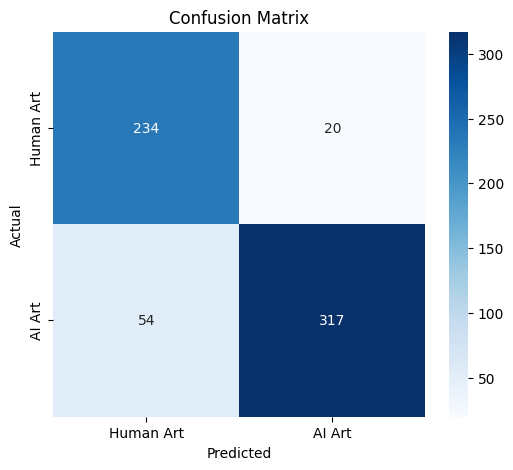

In [ ]:
#ACCURACY MEASUREMENTS FOR GE-CNN MODEL
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive

drive.mount('/content/drive')


# Load the trained model
model_path = "/content/drive/MyDrive/ai_art_classifier_gcnn.h5"
model = load_model(model_path)

# Load test dataset
X_test = np.load("/content/drive/MyDrive/X_test.npy")
y_test = np.load("/content/drive/MyDrive/y_test.npy")

# Evaluate model performance
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test)  # Get probability scores
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary labels

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Human Art", "AI Art"]))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Human Art", "AI Art"], yticklabels=["Human Art", "AI Art"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#TESTING MODEL WITH AN IMAGE
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import files
from PIL import Image
from google.colab import drive

drive.mount('/content/drive')

print("CNN MODEL PREDICTION")
# Load the trained model
model_path = "/content/drive/MyDrive/ai_art_classifier.h5"
model = load_model(model_path)

# Upload an image
uploaded = files.upload()

# Get the uploaded image filename
image_filename = list(uploaded.keys())[0]

# Load and preprocess the image
IMG_SIZE = 224  # Ensure it matches the model input size

def preprocess_image(image_path):
    """Load an image, resize, normalize, and prepare for model prediction."""
    img = Image.open(image_path).convert("RGB")  # Ensure 3 channels
    img = img.resize((IMG_SIZE, IMG_SIZE))  # Resize to match model input
    img_array = np.array(img) / 255.0  # Normalize pixel values (0-1)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array, img  # Return both array and original image for display

# Preprocess the uploaded image
image_array, original_image = preprocess_image(image_filename)

# Make prediction
y_pred_prob = model.predict(image_array)[0][0]  # Get probability score

# Convert probability to label
predicted_label = "AI Art" if y_pred_prob >= 0.5 else "Human Art"
confidence = (y_pred_prob if y_pred_prob >= 0.5 else 1 - y_pred_prob) * 100  # Convert to percentage

# Display the image with prediction
plt.imshow(original_image)
plt.axis("off")
plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence:.2f}%")  # Add percentage symbol
plt.show()


print("\nGE-CNN MODEL PREDICTION")

model_path = "/content/drive/MyDrive/ai_art_classifier_gcnn.h5"
model = load_model(model_path)


# Make prediction
y_pred_prob = model.predict(image_array)[0][0]  # Get probability score

# Convert probability to label
predicted_label = "AI Art" if y_pred_prob >= 0.5 else "Human Art"
confidence = (y_pred_prob if y_pred_prob >= 0.5 else 1 - y_pred_prob) * 100  # Convert to percentage

# Display the image with prediction
plt.imshow(original_image)
plt.axis("off")
plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence:.2f}%")  # Add percentage symbol
plt.show()


In [ ]:
#CONVERT THE MODEL TO TFLITE FOR FLUTTER

import tensorflow as tf
from google.colab import drive
from tensorflow.keras.models import load_model

drive.mount('/content/drive')

model_path = "/content/drive/MyDrive/ai_art_classifier.h5"
model = load_model(model_path)

# Convert to .tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the .tflite model
with open("/content/drive/MyDrive/ai_art_classifier.tflite", "wb") as f:
    f.write(tflite_model)

print("Model converted to ai_art_classifier.tflite and saved successfully!")


In [ ]:
# Save the TFLite model to Google Drive
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the save path
save_path = "/content/drive/MyDrive/gradcam_model.tflite"

# Save the model to Google Drive
with open(save_path, "wb") as f:
    f.write(tflite_model)

print(f"TFLite model saved successfully at {save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
TFLite model saved successfully at /content/drive/MyDrive/gradcam_model.tflite


In [ ]:
# Install TensorFlow and other required libraries
!pip install tensorflow
!pip install opencv-python
!pip install matplotlib
!pip install Pillow


In [ ]:
'/content/drive/MyDrive/sample_image.jpg'